# Corona Virus Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline
sbn.set(rc={'figure.figsize':(11.7,8.27)})


In [2]:
rawData = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [3]:
dataFrames = dict(states={}, counties={})
columns = ['cases', 'deaths']

def getTotal(): 
    if not "total" in dataFrames:
        dataFrames["total"] =rawData.groupby('date').sum()[columns]
    return dataFrames["total"]

def getState(state):
    if not state in dataFrames["states"]:
        statedf = rawData[rawData.state==state].groupby('date').sum()[columns]
        if statedf.empty:
            print (state + " is not in the data, did you spell it right? capitalization?")
            return 
        else:
            dataFrames["states"][state] = statedf
    return dataFrames["states"][state]

def getCounty(county):
    if not county in dataFrames["counties"]:
        countydf = rawData[rawData.county==county].groupby('date').sum()[columns]
        if countydf.empty:
            print(county + " is not in the data, did you spell it right? capitalization?")
            return
        else:
            dataFrames["counties"][county] = countydf
    return dataFrames["counties"][county]
        

In [4]:
yesterday, today = getTotal().tail(2).index.values # last two dates data to check how recent this data is
print("Latest date: ", today)

Latest date:  2020-04-21


In [5]:

yesterdayLatest = rawData[rawData.date == yesterday].groupby(['state', 'county']).sum()[columns]
latest = rawData[rawData.date == today].groupby(['state', 'county']).sum()[columns]
deltas = latest - yesterdayLatest
latest["newcases"] = deltas.cases
latest["newdeaths"] = deltas.deaths
latest = latest.reset_index()

In [6]:
def worstPlaces(state=None, count=15):
    if state == None:
        count = 30
        print(f"Counties with the most new cases in US for {today}:")
        display(latest.sort_values(['newcases', 'newdeaths'], ascending=False)[:count].reset_index(drop=True))
        print(f"Counties with the most new deaths in US for {today}:")
        display(latest.sort_values(['newdeaths', 'newcases'], ascending=False)[:count].reset_index(drop=True))
    else:
        print(f"Counties with the most new cases in {state} for {today}:")
        display(latest[latest.state==state].sort_values(['newcases', 'newdeaths'], ascending=False)[:count].reset_index(drop=True))
        print(f"Counties with the most new deaths in {state} for {today}:")
        display(latest[latest.state==state].sort_values(['newdeaths', 'newcases'], ascending=False)[:count].reset_index(drop=True))


In [7]:
worstPlaces()

Counties with the most new cases in US for 2020-04-21:


,state,county,cases,deaths,newcases,newdeaths
0,New York,New York City,139335,10301,2519.0,292.0
1,California,Los Angeles,15140,663,1324.0,46.0
2,Illinois,Cook,23181,1002,1080.0,87.0
3,New York,Suffolk,28154,918,492.0,31.0
4,New Jersey,Hudson,11636,525,486.0,33.0
5,Pennsylvania,Philadelphia,10028,394,475.0,24.0
6,New Jersey,Passaic,8941,294,462.0,31.0
7,New Jersey,Middlesex,8767,360,421.0,15.0
8,New York,Nassau,31079,1717,402.0,79.0
9,New Jersey,Essex,11128,849,399.0,98.0


Counties with the most new deaths in US for 2020-04-21:


,state,county,cases,deaths,newcases,newdeaths
0,New York,New York City,139335,10301,2519.0,292.0
1,Michigan,Wayne,14255,1278,343.0,130.0
2,New Jersey,Essex,11128,849,399.0,98.0
3,Illinois,Cook,23181,1002,1080.0,87.0
4,New York,Nassau,31079,1717,402.0,79.0
5,New Jersey,Bergen,13356,835,345.0,48.0
6,California,Los Angeles,15140,663,1324.0,46.0
7,Michigan,Macomb,4544,445,119.0,42.0
8,New Jersey,Union,10289,427,317.0,40.0
9,Pennsylvania,Montgomery,3154,223,114.0,39.0


In [8]:
worstPlaces("California")

Counties with the most new cases in California for 2020-04-21:


,state,county,cases,deaths,newcases,newdeaths
0,California,Los Angeles,15140,663,1324.0,46.0
1,California,Riverside,2960,93,113.0,8.0
2,California,San Diego,2434,87,109.0,15.0
3,California,San Bernardino,1489,67,83.0,7.0
4,California,Alameda,1260,43,48.0,1.0
5,California,Contra Costa,749,22,42.0,0.0
6,California,Imperial,195,4,35.0,2.0
7,California,Kern,671,3,28.0,0.0
8,California,Santa Clara,1946,89,24.0,5.0
9,California,Fresno,371,7,20.0,0.0


Counties with the most new deaths in California for 2020-04-21:


,state,county,cases,deaths,newcases,newdeaths
0,California,Los Angeles,15140,663,1324.0,46.0
1,California,San Diego,2434,87,109.0,15.0
2,California,Riverside,2960,93,113.0,8.0
3,California,San Bernardino,1489,67,83.0,7.0
4,California,Santa Clara,1946,89,24.0,5.0
5,California,Tulare,436,22,14.0,4.0
6,California,Imperial,195,4,35.0,2.0
7,California,San Joaquin,456,20,10.0,2.0
8,California,Alameda,1260,43,48.0,1.0
9,California,Sacramento,954,35,14.0,1.0


In [9]:
worstPlaces("Colorado")

Counties with the most new cases in Colorado for 2020-04-21:


,state,county,cases,deaths,newcases,newdeaths
0,Colorado,Denver,2004,91,124.0,8.0
1,Colorado,Weld,1180,69,59.0,1.0
2,Colorado,Arapahoe,1649,80,47.0,8.0
3,Colorado,Boulder,390,18,30.0,1.0
4,Colorado,Adams,996,46,28.0,9.0
5,Colorado,Jefferson,1011,40,24.0,4.0
6,Colorado,Morgan,180,4,13.0,1.0
7,Colorado,El Paso,744,53,10.0,3.0
8,Colorado,Larimer,250,13,5.0,0.0
9,Colorado,Gunnison,121,3,4.0,0.0


Counties with the most new deaths in Colorado for 2020-04-21:


,state,county,cases,deaths,newcases,newdeaths
0,Colorado,Adams,996,46,28.0,9.0
1,Colorado,Denver,2004,91,124.0,8.0
2,Colorado,Arapahoe,1649,80,47.0,8.0
3,Colorado,Jefferson,1011,40,24.0,4.0
4,Colorado,El Paso,744,53,10.0,3.0
5,Colorado,Weld,1180,69,59.0,1.0
6,Colorado,Boulder,390,18,30.0,1.0
7,Colorado,Morgan,180,4,13.0,1.0
8,Colorado,Clear Creek,11,1,0.0,1.0
9,Colorado,Larimer,250,13,5.0,0.0


In [10]:
worstPlaces("Arizona")

Counties with the most new cases in Arizona for 2020-04-21:


,state,county,cases,deaths,newcases,newdeaths
0,Arizona,Maricopa,2738,84,102.0,9.0
1,Arizona,Apache,226,5,24.0,1.0
2,Arizona,Pima,963,65,22.0,7.0
3,Arizona,Navajo,485,11,12.0,0.0
4,Arizona,Pinal,268,7,12.0,0.0
5,Arizona,Coconino,342,35,5.0,5.0
6,Arizona,Mohave,59,3,3.0,0.0
7,Arizona,Santa Cruz,23,0,3.0,0.0
8,Arizona,Cochise,29,0,1.0,0.0
9,Arizona,Gila,9,0,1.0,0.0


Counties with the most new deaths in Arizona for 2020-04-21:


,state,county,cases,deaths,newcases,newdeaths
0,Arizona,Maricopa,2738,84,102.0,9.0
1,Arizona,Pima,963,65,22.0,7.0
2,Arizona,Coconino,342,35,5.0,5.0
3,Arizona,Apache,226,5,24.0,1.0
4,Arizona,Navajo,485,11,12.0,0.0
5,Arizona,Pinal,268,7,12.0,0.0
6,Arizona,Mohave,59,3,3.0,0.0
7,Arizona,Santa Cruz,23,0,3.0,0.0
8,Arizona,Cochise,29,0,1.0,0.0
9,Arizona,Gila,9,0,1.0,0.0


In [11]:
def fitExponential(series):
    series = series.dropna()
    series = series[series>0]
    logseries = np.log(series)
    n = len(logseries)
    rate, intercept = np.polyfit(np.arange(n), logseries, 1) 
    base = np.exp(intercept)
    return (rate, base, n) 


In [12]:
def plotFitted(series, name, log=True): 
    (rate, base, n) = fitExponential(series)
    x = np.arange(n)
    series = series[-n:]
    if log:
        plt.semilogy()
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    sbn.scatterplot(x, series, label=f"{name} actual")
    sbn.lineplot(x, base * np.exp(rate*x) , label=f"{name} expected with constant exponential growth")
    plt.show()

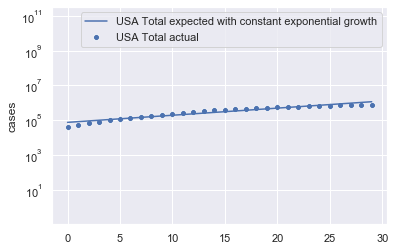

In [13]:
plotFitted(getTotal()["cases"][-30:], "USA Total")

In [14]:
def growthRateAnalysis(series, name, n=30):
    rate, base, n = fitExponential(series[-n:])
    name = f"{name} {series.name}"
    formula = f"{series.name} = {np.round(base, 2)} * exp({np.round(rate, 4)} * day)"
    dailyGrowth = np.round(100 * (np.exp(rate) - 1), 2)
    daysToDoubling = np.round(np.log(2)/rate, 2)
    print(f"{name} exponential formula fitted with {n} points:")
    print(formula)
    print(f"fitted daily growth rate: {dailyGrowth} %, fitted days to doubling: {daysToDoubling}")
    deltas = series.diff(1)
    rates = 100*deltas/series
    data = {
        f"{name} day to day growth rate (%)":rates, 
        f"{name} 3 day moving average":rates.rolling(window=3).mean(), 
        f"{name} 5 day moving average":rates.rolling(window=5).mean(), 
    }
    df = pd.DataFrame(data).dropna()[-n:]
    gr = df.tail(1)[f"{name} 5 day moving average"].values[0]
    dailyGrowth = np.round(gr, 2)
    daysToDoubling = np.round(np.log(2)*100/gr, 2)
    print(f"actual daily growth rate: {dailyGrowth} %, actual days to doubling: {daysToDoubling}")    
    sbn.lineplot(data=df)
    plt.show()
    plotFitted(series[-n:], name)


Total USA cases exponential formula fitted with 30 points:
cases = 76480.5 * exp(0.0939 * day)
fitted daily growth rate: 9.85 %, fitted days to doubling: 7.38
actual daily growth rate: 3.66 %, actual days to doubling: 18.92


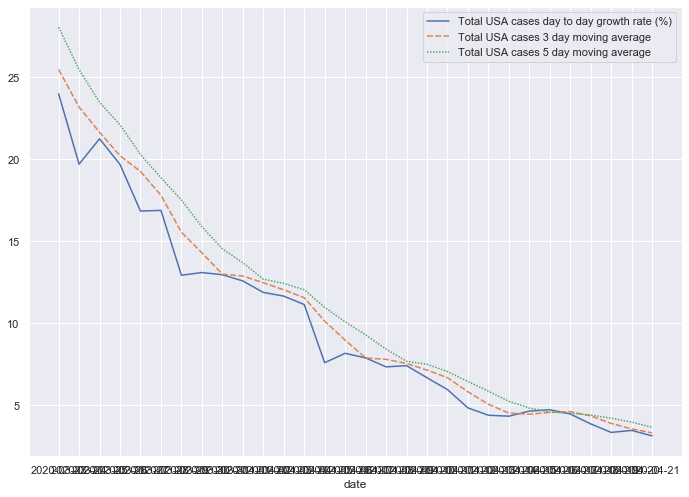

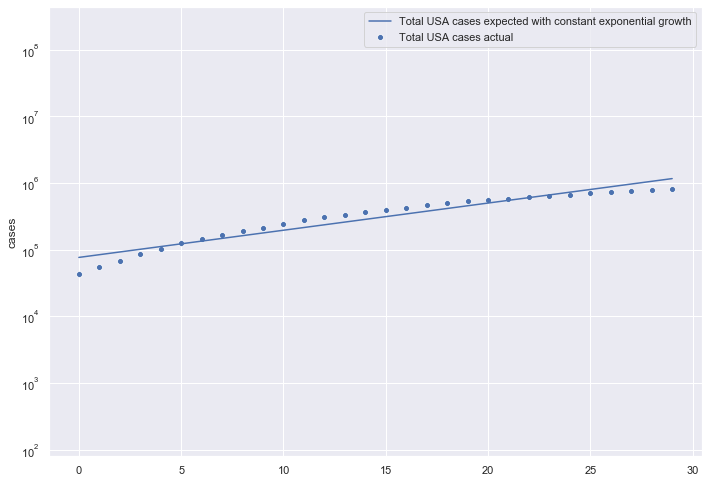

In [15]:
growthRateAnalysis(getTotal()['cases'], "Total USA")

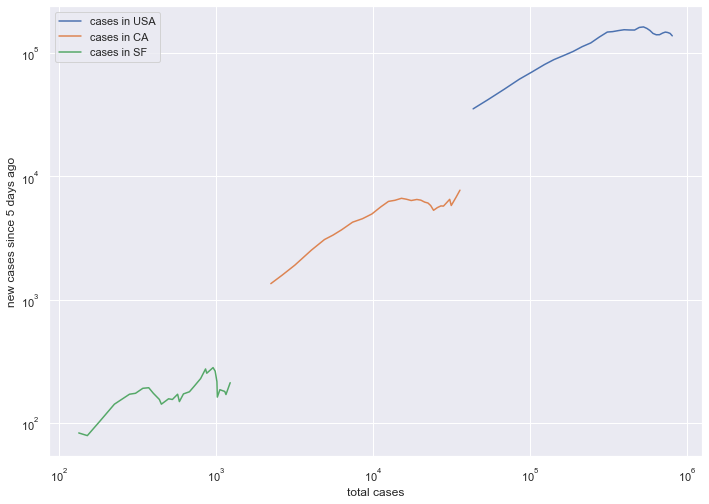

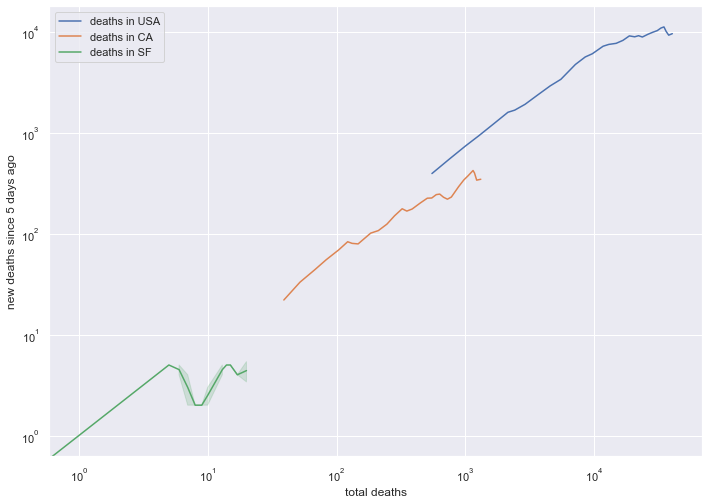

In [16]:
def trajectoryPlot(series, name):
    deltas = series.diff(5)
    fullname = f"{series.name} in {name}"
    x = f"total {series.name}"
    y = f"new {series.name} since 5 days ago"
    data = {x: series, y: deltas}
    plt.loglog()
    df = pd.DataFrame(data).dropna()[-30:]
    sbn.lineplot(x, y, data=df, label=fullname)
    
trajectoryPlot(getTotal()['cases'], "USA")
trajectoryPlot(getState("California")['cases'], "CA")
trajectoryPlot(getCounty("San Francisco")["cases"], "SF")
plt.show()
trajectoryPlot(getTotal()['deaths'], "USA")
trajectoryPlot(getState("California")['deaths'], "CA")
trajectoryPlot(getCounty("San Francisco")["deaths"], "SF")
plt.show()

In [17]:
def laggedPlot(df, name):
    vals = df.copy()
    vals = df.dropna()[df.cases > 0]
    # show correlation with wide range of time lags
    for i in range(30):
        vals[i] = df.cases.shift(i)
    vals = vals.drop(columns='cases')
    vals = vals[vals.deaths > 0][-20:]
    corrs = vals.corr()[['deaths']].drop('deaths')
    lc = np.log(vals).corr()[['deaths']].drop('deaths')
    lc[0] = lc.deaths
    for i in [3, 5, 7]:
        lc[i] = lc.deaths.rolling(i).mean()
    lc = lc.dropna()
    corrdata = {
        f"{name} correlation of log of deaths to log of cases by # of days ago": lc[0],
        f"{name} correlation 3 day moving average": lc[3],
        f"{name} correlation 5 day moving average": lc[5],
        f"{name} correlation 7 day moving average": lc[7],
    }
    corrsdf = pd.DataFrame(corrdata)
    print(f"Correlations for {name}:")
    sbn.lineplot(data=corrsdf)
    plt.show()
    # dig deeper into an interesting set of time lags
    values = vals[["deaths"]].copy()
    ratios = vals[["deaths"]].copy()
    interesting = [7, 14]
    for i in [0, 3, 5, 7]:
        l = lc[i].dropna()
        lmax = l[l==max(l)] # max at this correlation moving average
        interesting += list(lmax.index)
    for i in sorted(list(set(interesting))):
        values[f"{name} cases {i} days ago"] = vals[i]
        ratios[f"{name} deaths/cases {i} days ago"] = vals.deaths/vals[i]
    ratios = ratios.drop(columns=['deaths'])
    print(f"Deaths vs Lagged Values For {name}:")
    plt.semilogy()
    sbn.lineplot(data=values, dashes=False)
    plt.show()
    print(f"Deaths / Lagged Values For {name}:")
    plt.semilogy()
    sbn.lineplot(data=ratios, dashes=False)
    plt.show()

    

In [18]:
# laggedPlot(getTotal(), "USA")
# laggedPlot(getState("California"), "CA")
# laggedPlot(getCounty("San Francisco"), "SF")

In [19]:
def analyse(counties=[], states=[], n=20):
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    names = counties + states + ["USA total:"]
    rates= []
    dfs = [getCounty(c) for c in counties] + [getState(s) for s in states] + [getTotal()] 
    print("Trajectory Plots to see if the curve is flattening:")
    for col in ["cases", "deaths"]:
        for df, name in zip(dfs, names):
            trajectoryPlot(df[col], name)
        plt.show()
    for df, name in zip(dfs, names):
        print(f"\n### Analysis for {name:} ###\n")
        growthRateAnalysis(df["cases"], name)
        growthRateAnalysis(df["deaths"], name)
        print(f"Trajectory plots for {name}, to see when the curve starts flattening")
        trajectoryPlot(df.cases, name)
        trajectoryPlot(df.deaths, name)
        plt.show()
#         laggedPlot(df, name)


        
    
    

Trajectory Plots to see if the curve is flattening:


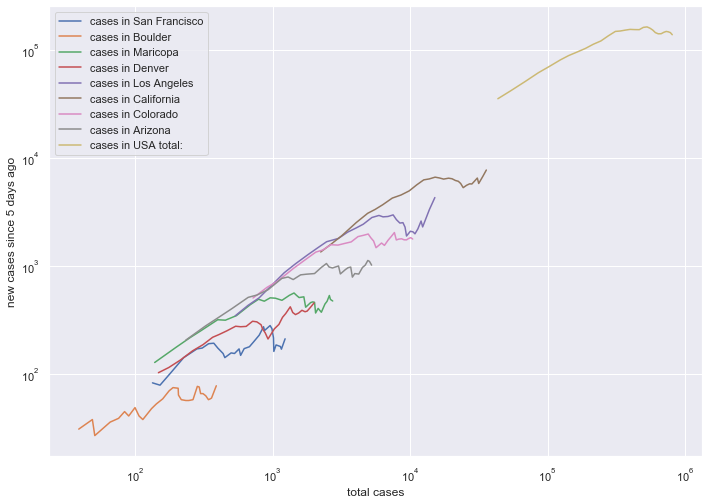

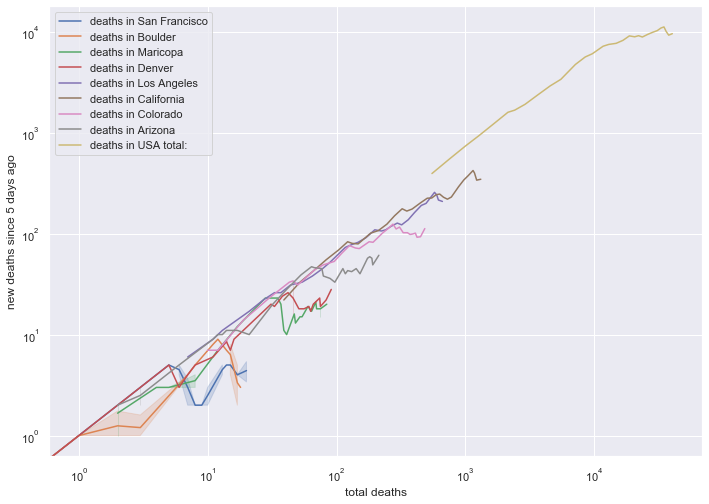


### Analysis for San Francisco ###

San Francisco cases exponential formula fitted with 30 points:
cases = 199.84 * exp(0.0708 * day)
fitted daily growth rate: 7.34 %, fitted days to doubling: 9.79
actual daily growth rate: 3.68 %, actual days to doubling: 18.85


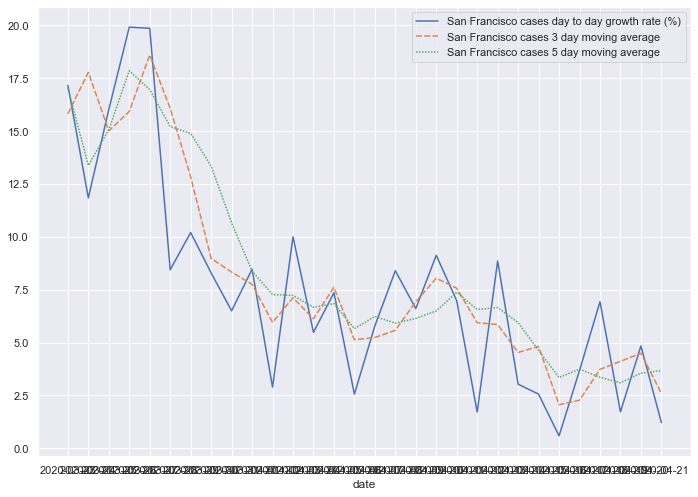

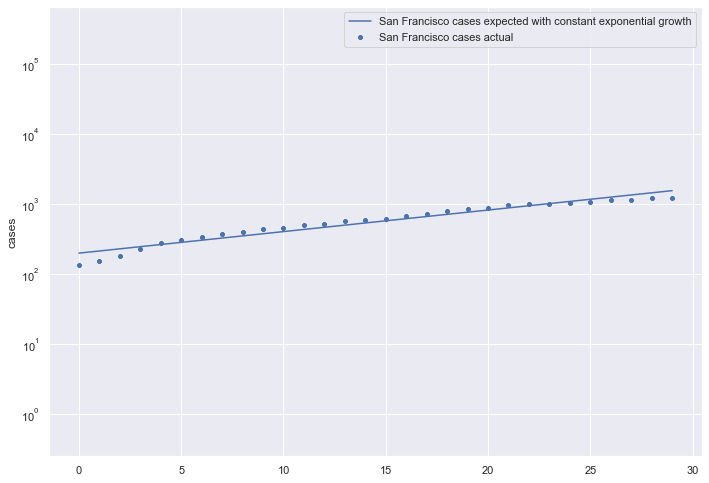

San Francisco deaths exponential formula fitted with 28 points:
deaths = 2.87 * exp(0.0838 * day)
fitted daily growth rate: 8.74 %, fitted days to doubling: 8.27
actual daily growth rate: 3.0 %, actual days to doubling: 23.1


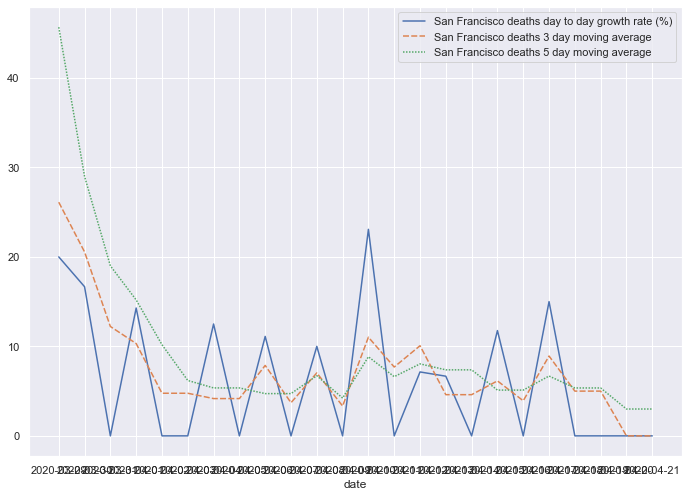

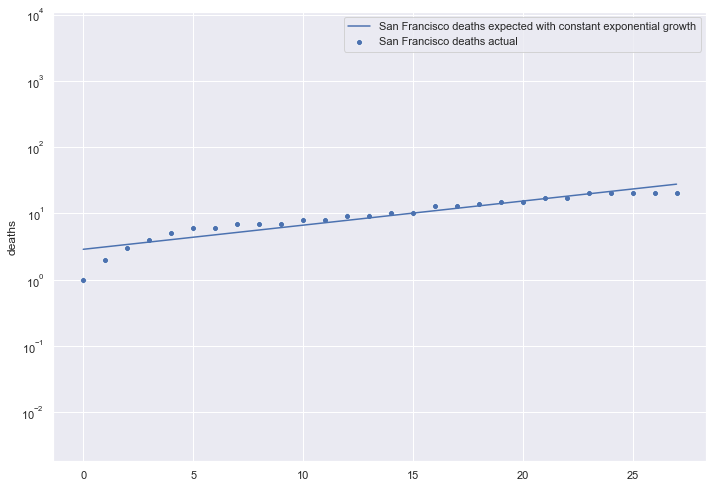

Trajectory plots for San Francisco, to see when the curve starts flattening


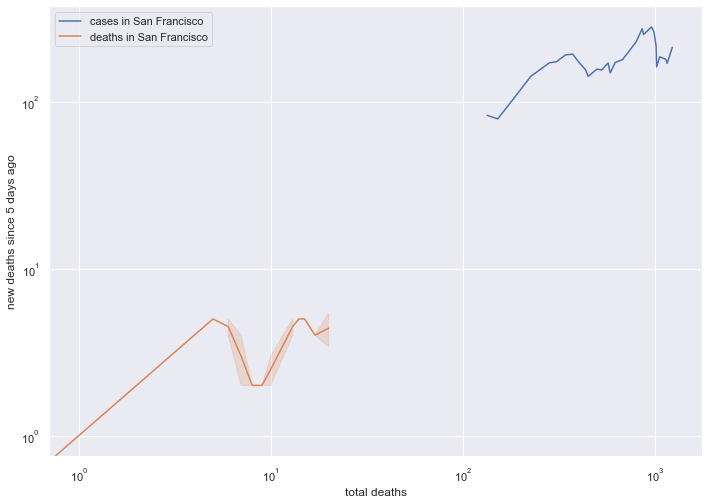


### Analysis for Boulder ###

Boulder cases exponential formula fitted with 30 points:
cases = 56.16 * exp(0.0739 * day)
fitted daily growth rate: 7.67 %, fitted days to doubling: 9.38
actual daily growth rate: 4.35 %, actual days to doubling: 15.95


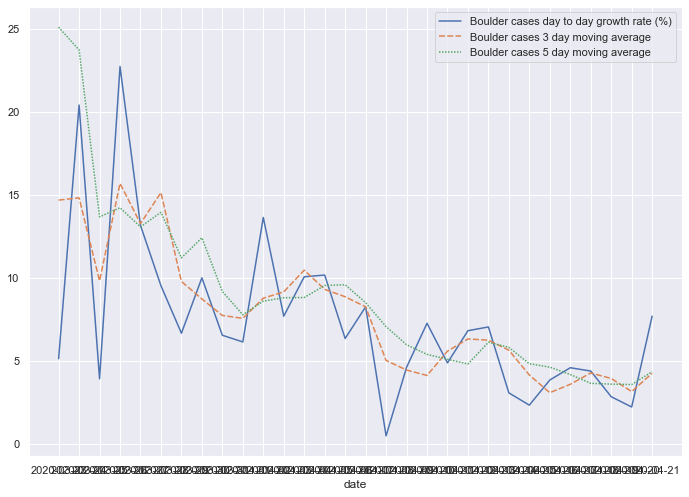

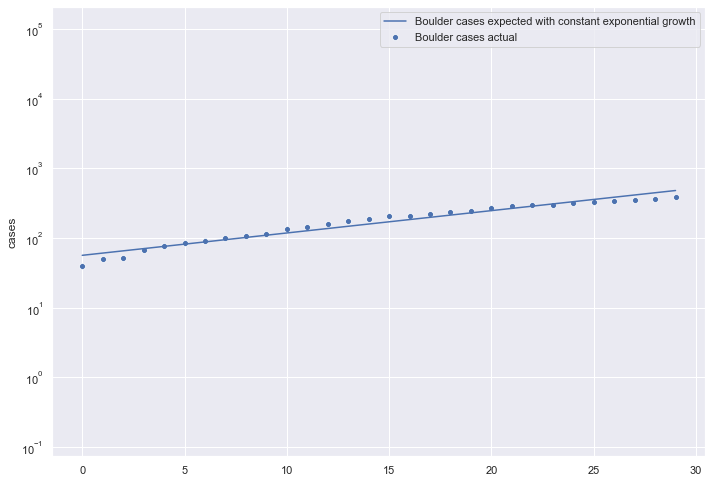

Boulder deaths exponential formula fitted with 26 points:
deaths = 0.91 * exp(0.1343 * day)
fitted daily growth rate: 14.37 %, fitted days to doubling: 5.16
actual daily growth rate: 3.46 %, actual days to doubling: 20.01


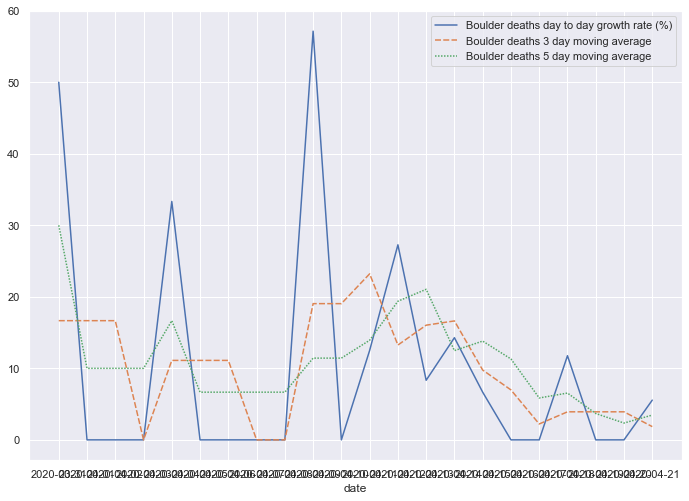

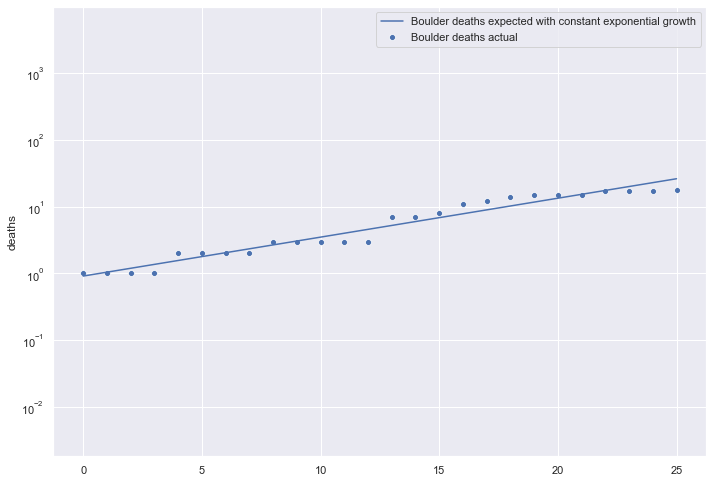

Trajectory plots for Boulder, to see when the curve starts flattening


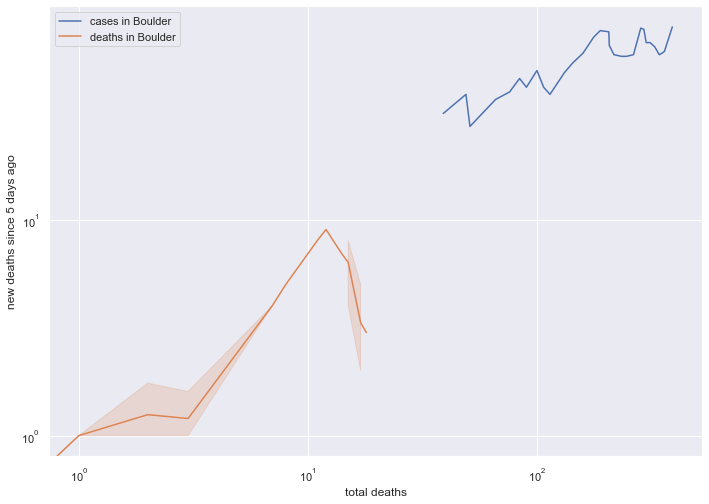


### Analysis for Maricopa ###

Maricopa cases exponential formula fitted with 30 points:
cases = 295.28 * exp(0.0899 * day)
fitted daily growth rate: 9.41 %, fitted days to doubling: 7.71
actual daily growth rate: 3.72 %, actual days to doubling: 18.62


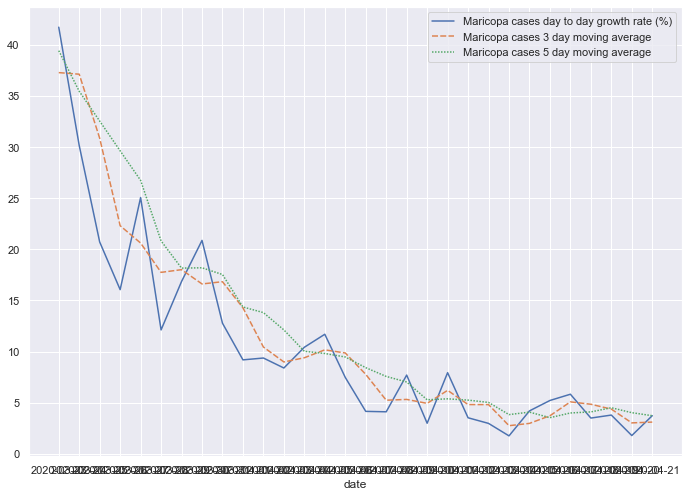

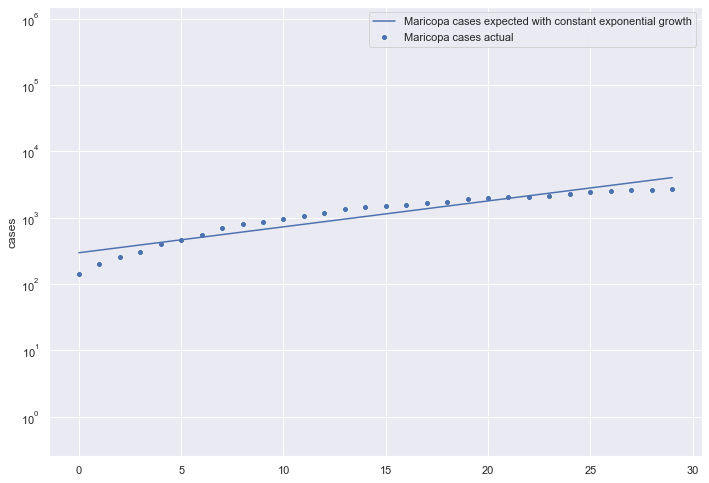

Maricopa deaths exponential formula fitted with 30 points:
deaths = 2.78 * exp(0.1355 * day)
fitted daily growth rate: 14.51 %, fitted days to doubling: 5.12
actual daily growth rate: 5.21 %, actual days to doubling: 13.3


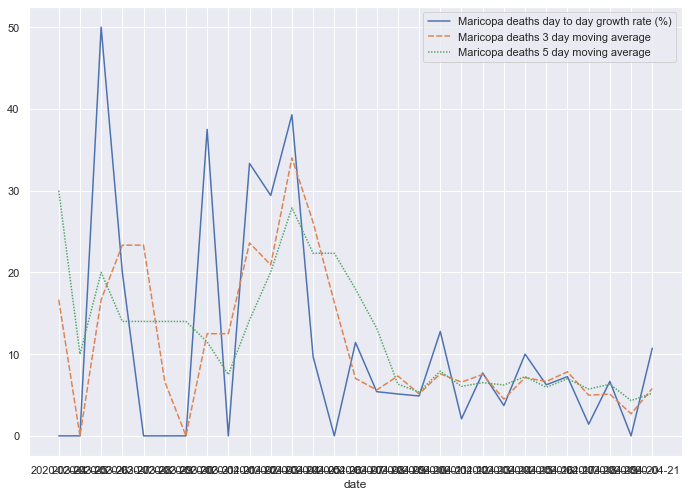

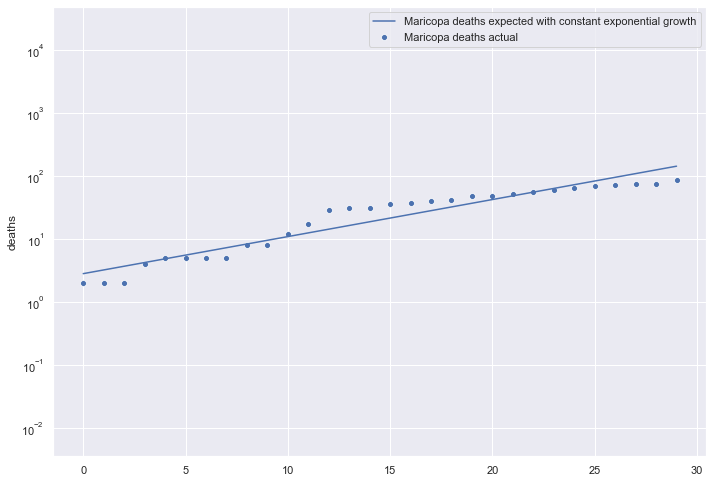

Trajectory plots for Maricopa, to see when the curve starts flattening


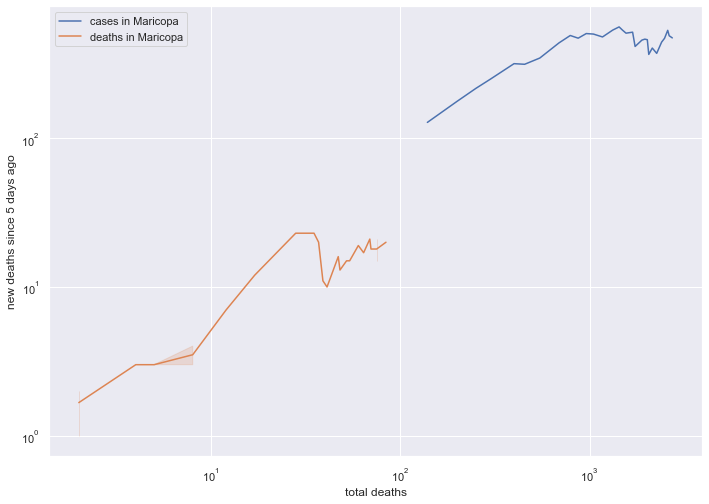


### Analysis for Denver ###

Denver cases exponential formula fitted with 30 points:
cases = 233.05 * exp(0.0816 * day)
fitted daily growth rate: 8.51 %, fitted days to doubling: 8.49
actual daily growth rate: 5.02 %, actual days to doubling: 13.82


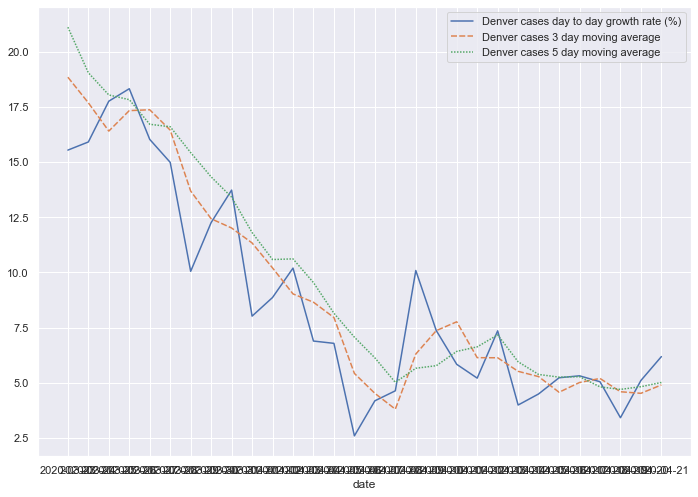

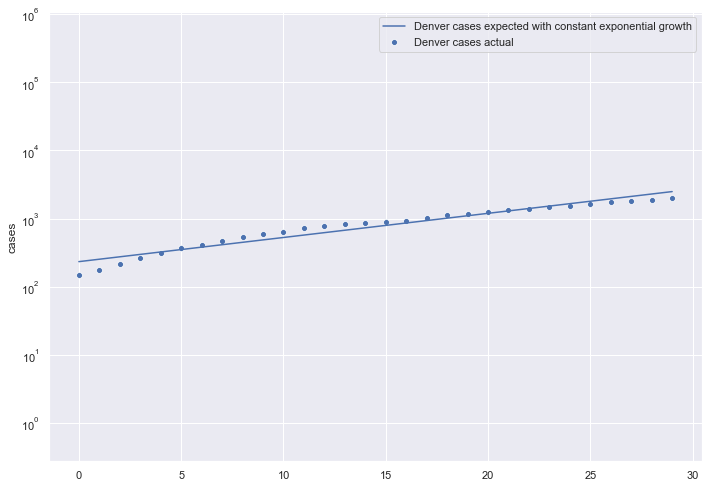

Denver deaths exponential formula fitted with 28 points:
deaths = 3.38 * exp(0.1358 * day)
fitted daily growth rate: 14.54 %, fitted days to doubling: 5.11
actual daily growth rate: 7.02 %, actual days to doubling: 9.87


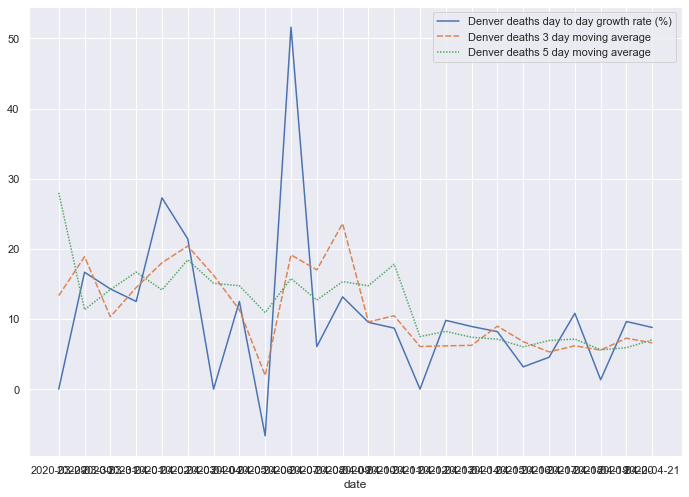

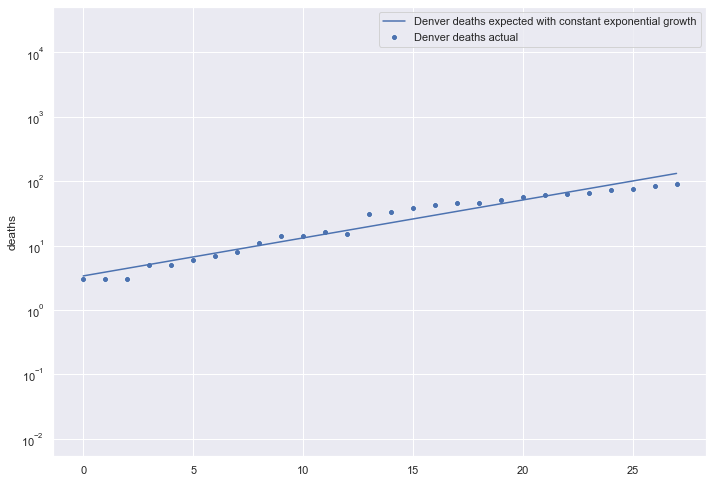

Trajectory plots for Denver, to see when the curve starts flattening


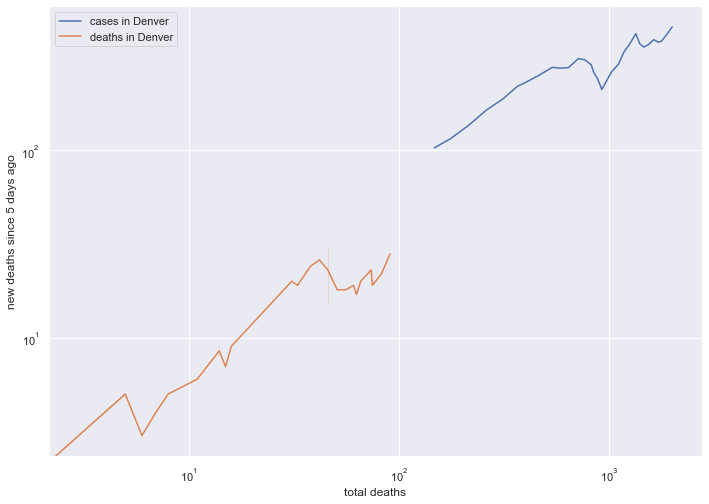


### Analysis for Los Angeles ###

Los Angeles cases exponential formula fitted with 30 points:
cases = 1060.86 * exp(0.1034 * day)
fitted daily growth rate: 10.9 %, fitted days to doubling: 6.7
actual daily growth rate: 6.39 %, actual days to doubling: 10.84


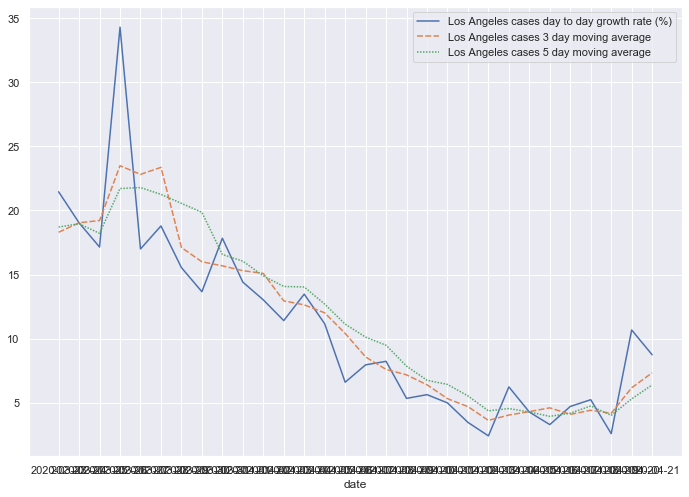

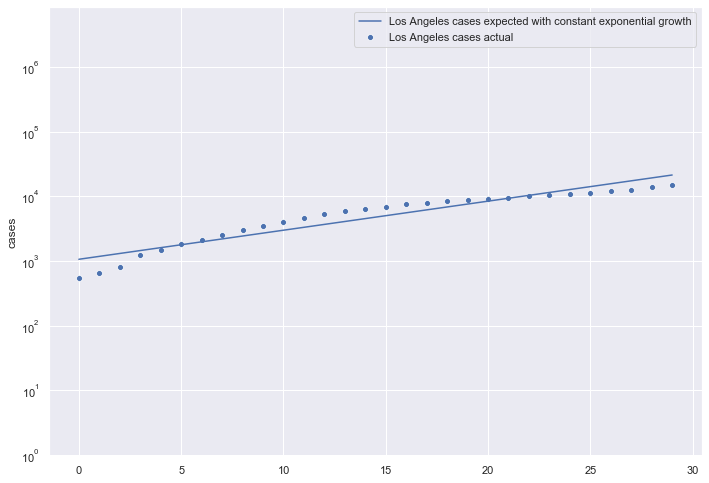

Los Angeles deaths exponential formula fitted with 30 points:
deaths = 14.55 * exp(0.1464 * day)
fitted daily growth rate: 15.77 %, fitted days to doubling: 4.73
actual daily growth rate: 7.17 %, actual days to doubling: 9.67


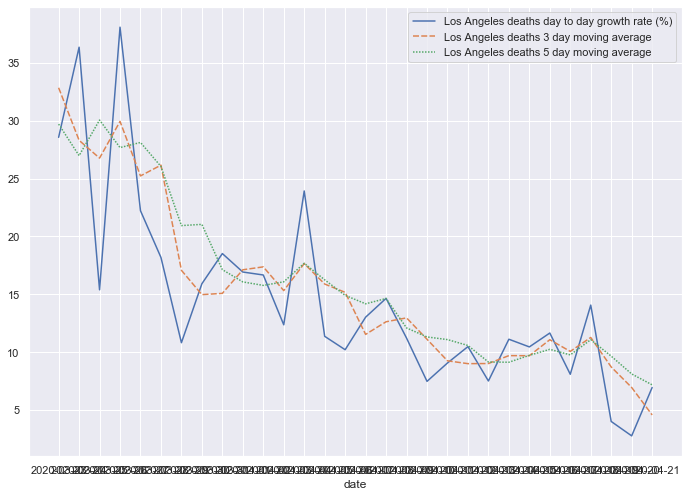

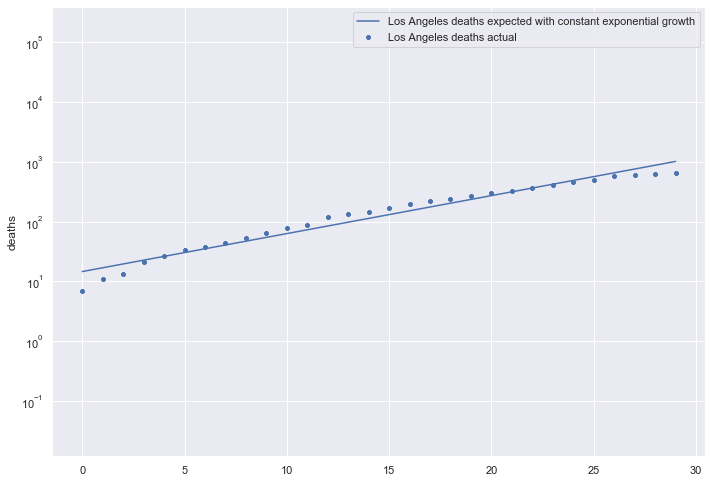

Trajectory plots for Los Angeles, to see when the curve starts flattening


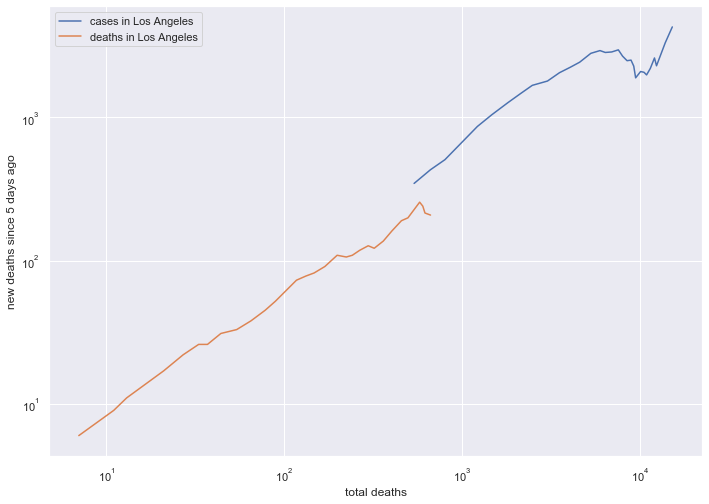


### Analysis for California ###

California cases exponential formula fitted with 30 points:
cases = 3648.58 * exp(0.0891 * day)
fitted daily growth rate: 9.32 %, fitted days to doubling: 7.78
actual daily growth rate: 4.71 %, actual days to doubling: 14.71


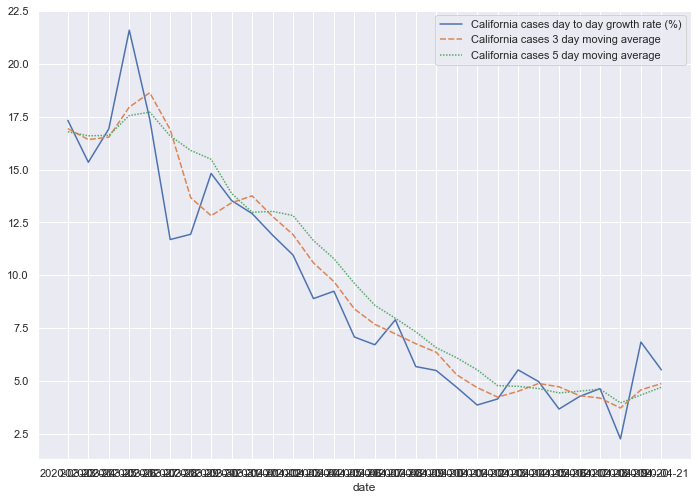

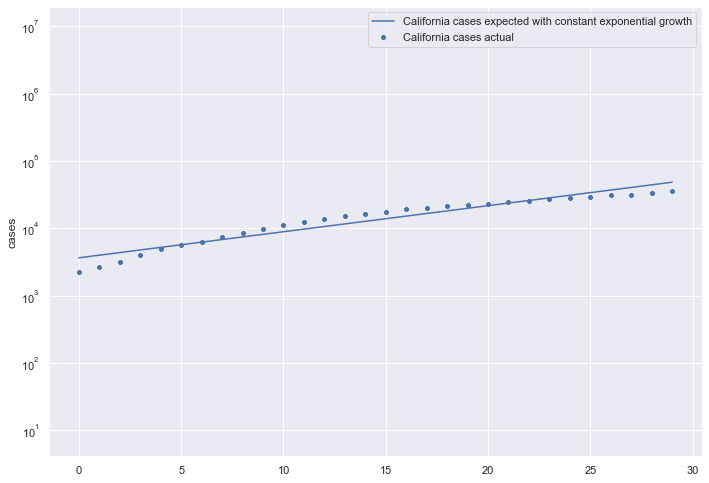

California deaths exponential formula fitted with 30 points:
deaths = 65.68 * exp(0.114 * day)
fitted daily growth rate: 12.08 %, fitted days to doubling: 6.08
actual daily growth rate: 5.87 %, actual days to doubling: 11.8


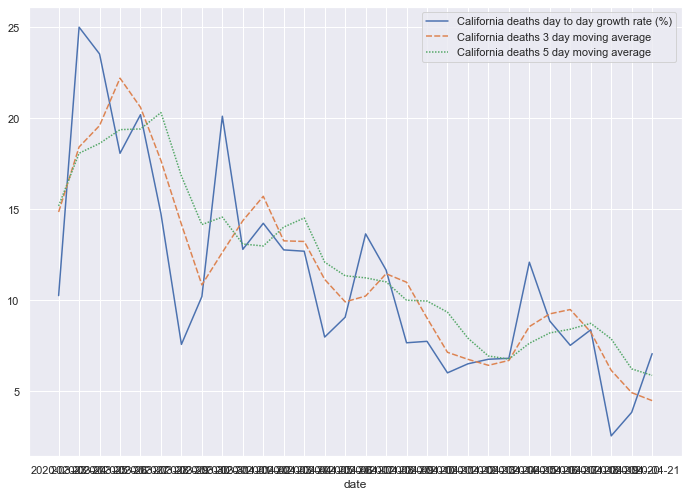

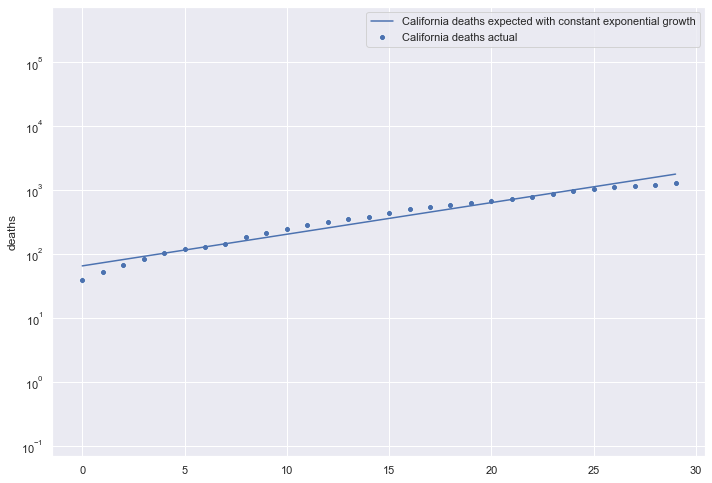

Trajectory plots for California, to see when the curve starts flattening


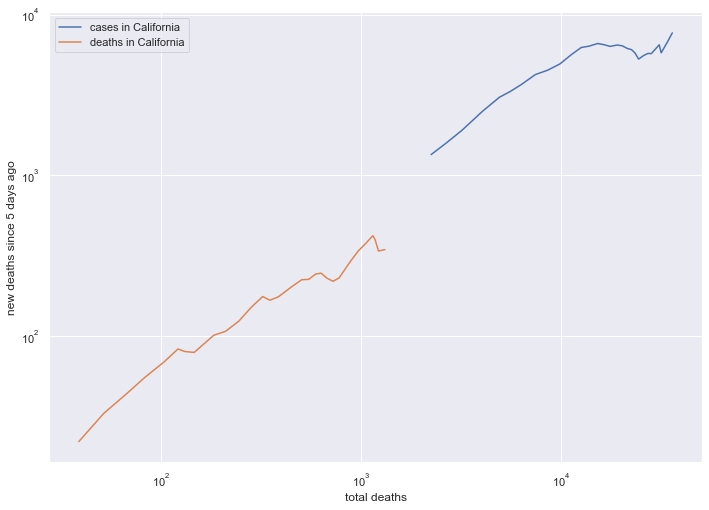


### Analysis for Colorado ###

Colorado cases exponential formula fitted with 30 points:
cases = 1293.72 * exp(0.0828 * day)
fitted daily growth rate: 8.63 %, fitted days to doubling: 8.37
actual daily growth rate: 3.65 %, actual days to doubling: 19.0


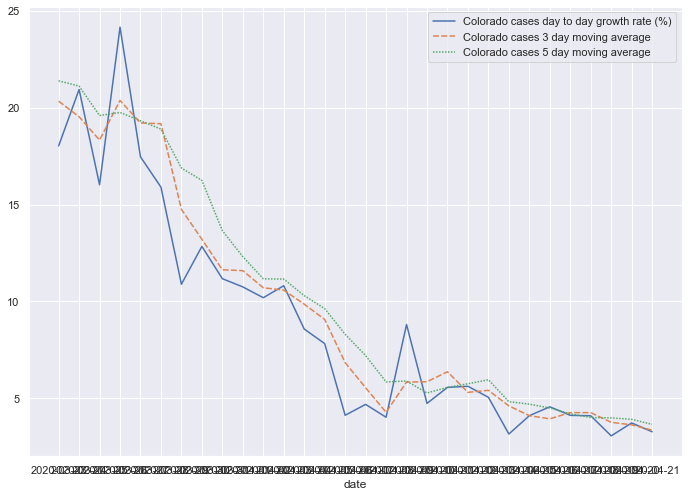

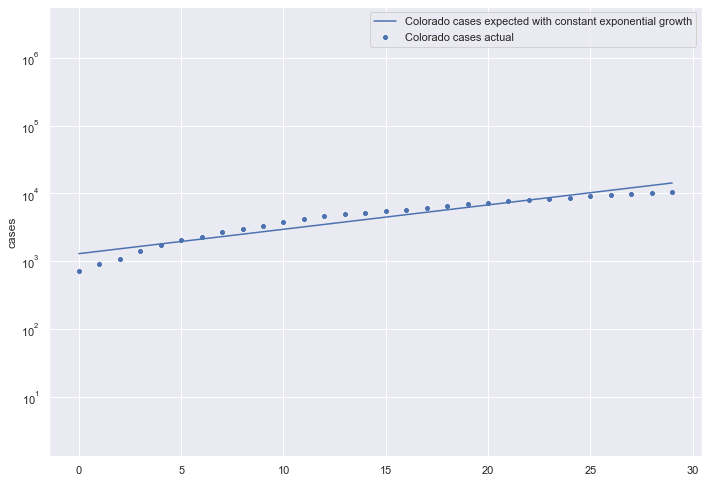

Colorado deaths exponential formula fitted with 30 points:
deaths = 20.21 * exp(0.1255 * day)
fitted daily growth rate: 13.37 %, fitted days to doubling: 5.52
actual daily growth rate: 5.12 %, actual days to doubling: 13.55


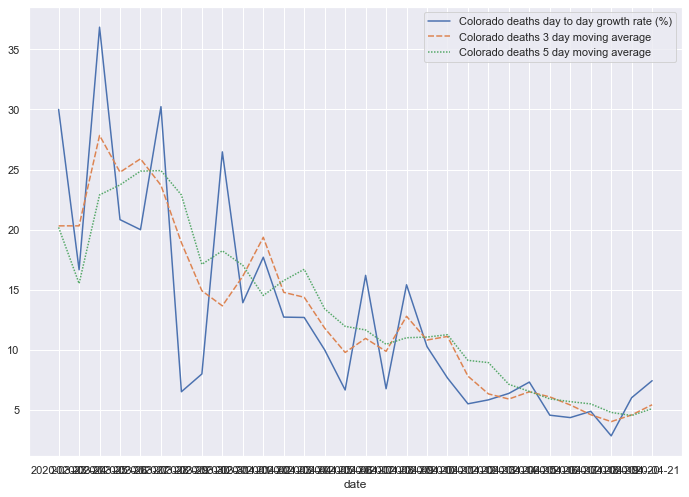

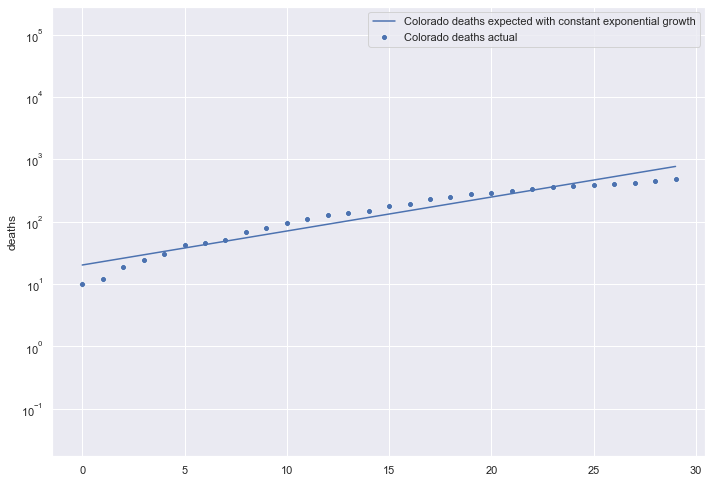

Trajectory plots for Colorado, to see when the curve starts flattening


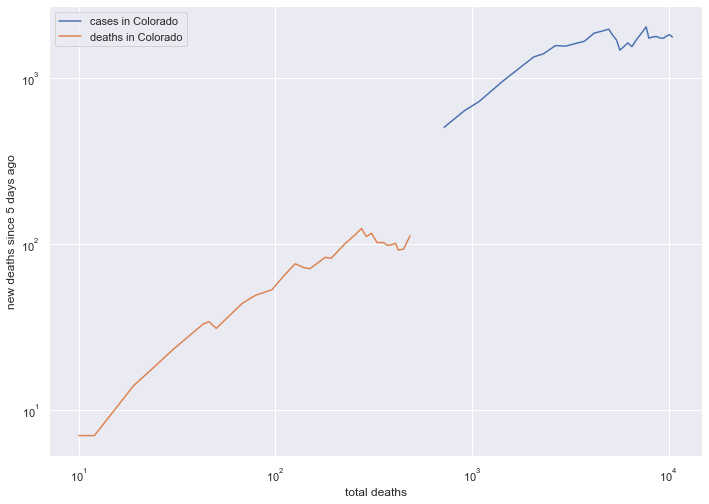


### Analysis for Arizona ###

Arizona cases exponential formula fitted with 30 points:
cases = 476.78 * exp(0.0957 * day)
fitted daily growth rate: 10.04 %, fitted days to doubling: 7.24
actual daily growth rate: 4.21 %, actual days to doubling: 16.47


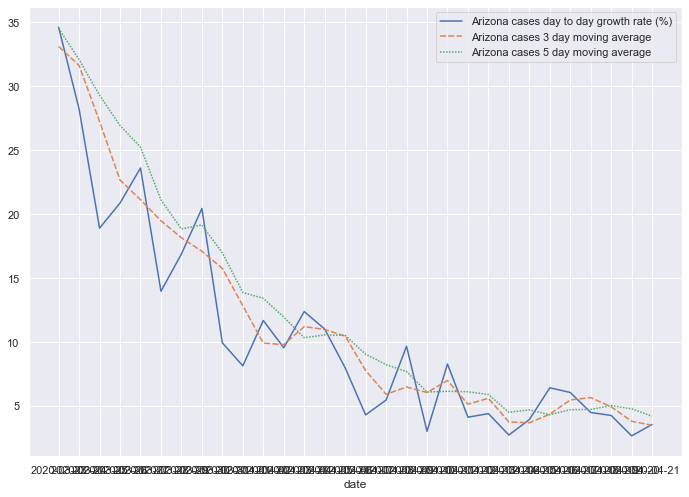

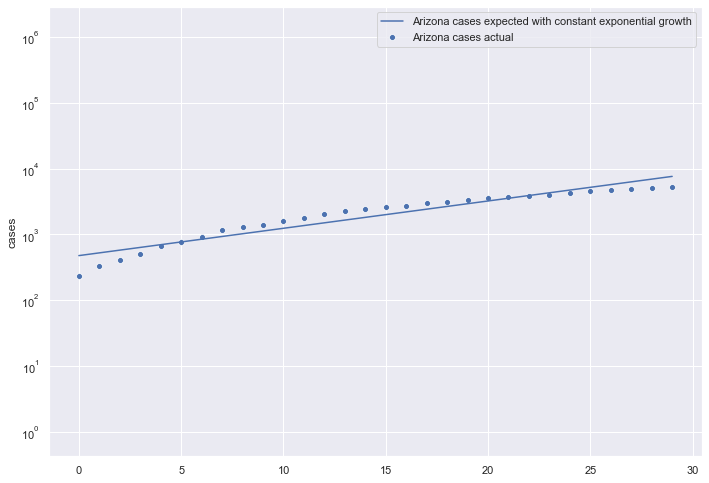

Arizona deaths exponential formula fitted with 30 points:
deaths = 4.95 * exp(0.1501 * day)
fitted daily growth rate: 16.2 %, fitted days to doubling: 4.62
actual daily growth rate: 6.43 %, actual days to doubling: 10.79


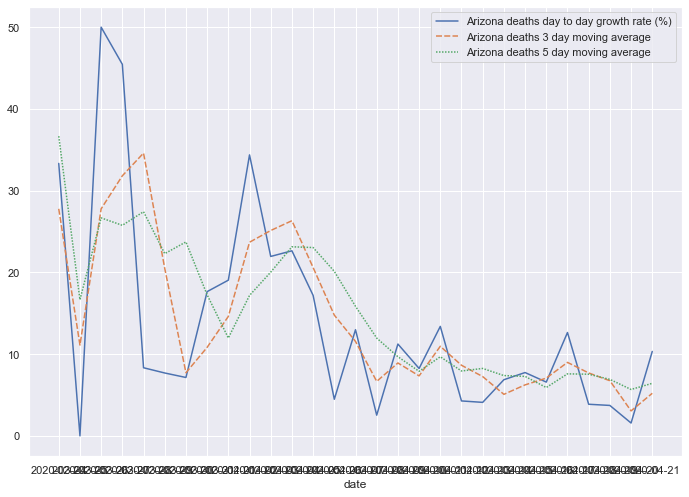

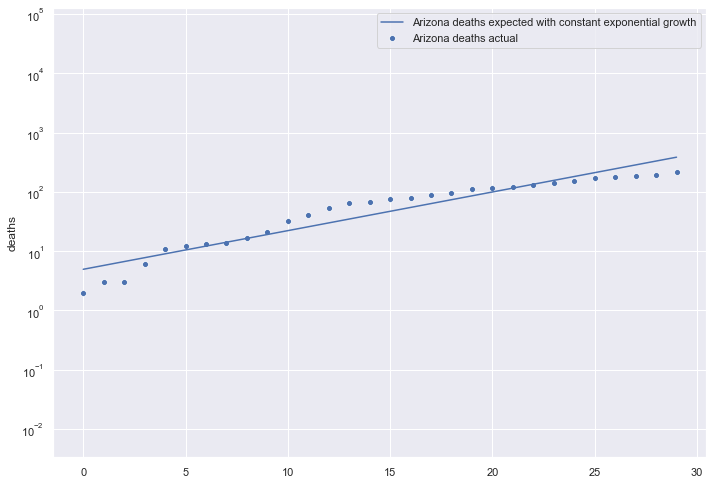

Trajectory plots for Arizona, to see when the curve starts flattening


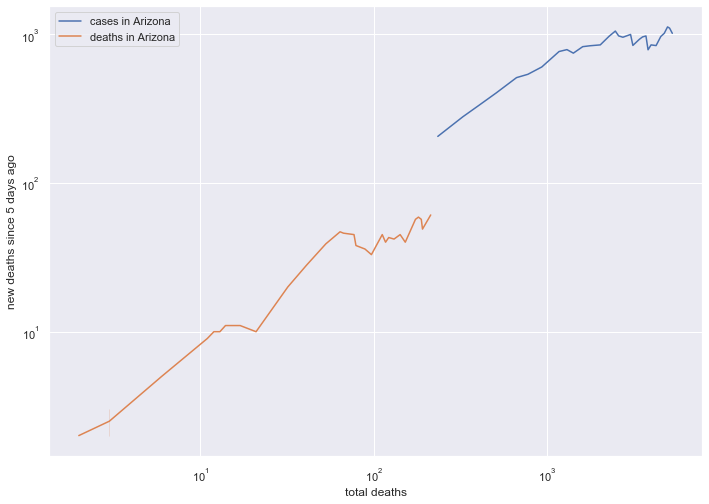


### Analysis for USA total: ###

USA total: cases exponential formula fitted with 30 points:
cases = 76480.5 * exp(0.0939 * day)
fitted daily growth rate: 9.85 %, fitted days to doubling: 7.38
actual daily growth rate: 3.66 %, actual days to doubling: 18.92


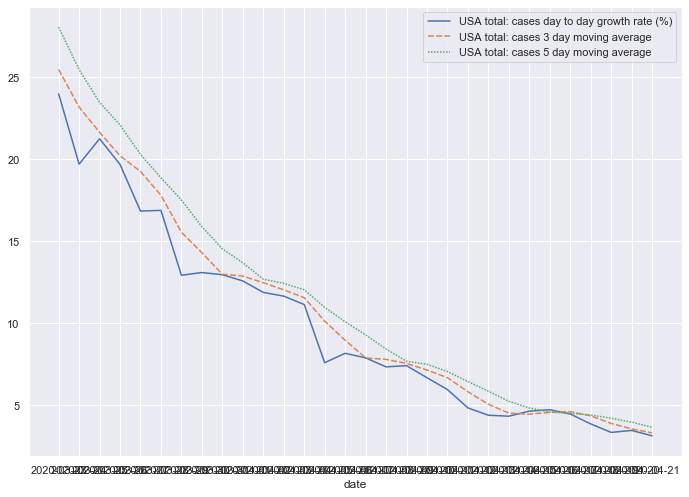

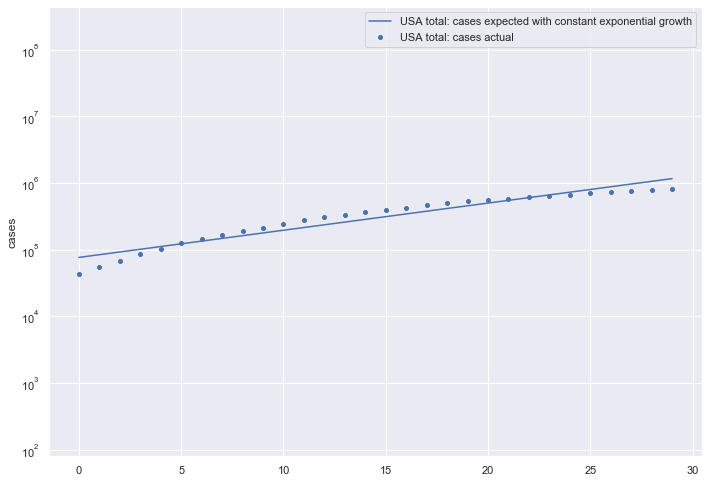

USA total: deaths exponential formula fitted with 30 points:
deaths = 1044.66 * exp(0.1445 * day)
fitted daily growth rate: 15.55 %, fitted days to doubling: 4.8
actual daily growth rate: 5.25 %, actual days to doubling: 13.21


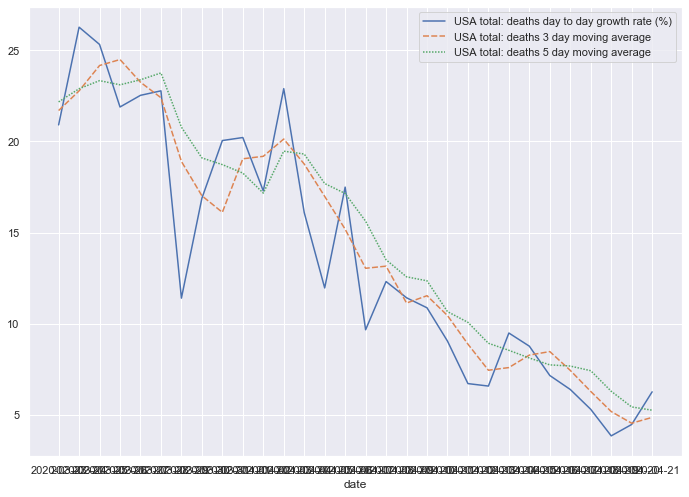

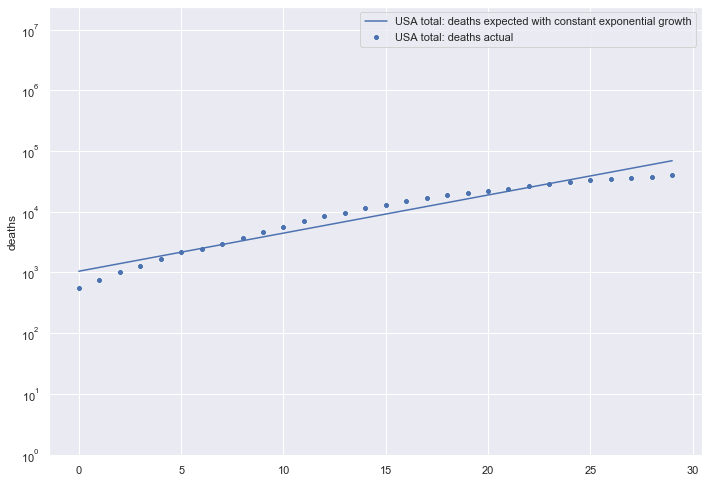

Trajectory plots for USA total:, to see when the curve starts flattening


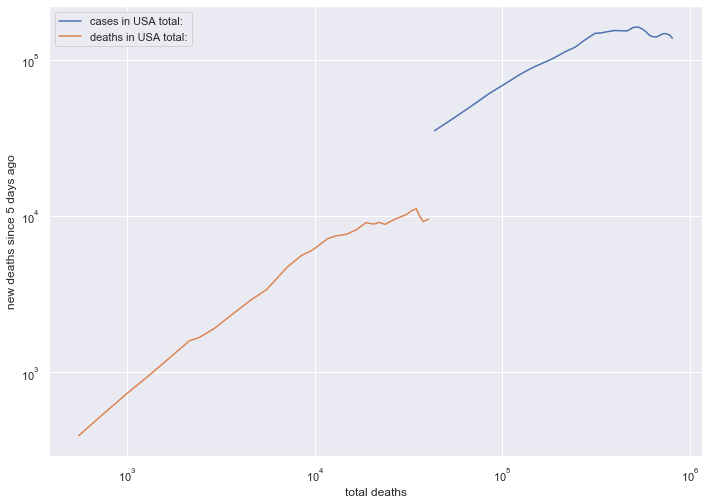

In [20]:
counties =["San Francisco", "Boulder", "Maricopa", "Denver", "Los Angeles"]
states = [ "California", "Colorado", "Arizona"]
analyse(counties=counties, states=states)